# Word clouds

#### July 2016

Work in a Conda environment.

```
$ conda create -n py27 python=2.7 anaconda
$ source activate py27

$ pip install wordcloud
```

Download both an English and a French translations of Dostoyevsky's "The Possessed" from [Project Gutenberg](http://www.gutenberg.org/wiki/Main_Page) in plain text format (UTF-8):

```
$ wget http://www.gutenberg.org/ebooks/8117.txt.utf-8 -O ThePossessed.txt
$ wget http://www.gutenberg.org/ebooks/16824.txt.utf-8 -O LesPossedes.txt
```

Generate both word clouds using the example provided in the [GitHub repo](https://github.com/amueller/word_cloud) (with slight modifications).

In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from IPython.core.display import Image

In [35]:
def make_word_cloud(input_text, mask, output_file_name, stopwords=None, extra_stopwords=None,
                    background_color = "white", max_words=2000):
    """
    Generates word cloud and writes it to .png file.
    """
    
    # Read the whole text
    text = open(input_text).read()
    # read the mask image
    mask = np.array(Image.open(mask))
    
    stopwords = set(stopwords)

    if extra_stopwords is not None:
        [stopwords.add(word) for word in extra_stopwords]

    wc = WordCloud(background_color=background_color, max_words=max_words,
                   mask=mask, stopwords=stopwords)
    
    # generate word cloud
    wc.generate(text)
    # store to file
    wc.to_file(output_file_name)


## Stop words

The English _stop word_ collection included with `word_cloud`, as well as both the English and the French collections provided by the package `NLTK`, are rather small. If the generated cloud worked well for English, the French cloud is still dominated by common words. It is worth getting a more comprehensive collection from a specialized website, in order to bring out more informative words.

Here's the size of the _word_coud_ and NLTK collections:

In [38]:
# For French we need to get stopwords elsewhere
# Let's get NLTK's collection
from nltk.corpus import stopwords
english_sw = stopwords.words('english')
french_sw = stopwords.words('french')

More extensive stop word lists provided by [IR Multilingual Resources at UniNE](http://members.unine.ch/jacques.savoy/clef/) (from _Université de Neuchâtel_, Switzerland). Download the English (571 words from Smart) and French (463 words) stop word lists:

```
$ wget http://members.unine.ch/jacques.savoy/clef/englishST.txt
$ wget http://members.unine.ch/jacques.savoy/clef/frenchST.txt
```

In [40]:
def load_words_from_file(path_to_file):
    sw_list = []
    with open(path_to_file, 'r') as f:
        [sw_list.append(word) for line in f for word in line.split()]
    return sw_list



english_sw_UniNE = load_words_from_file('englishST.txt')
french_sw_UniNE = load_words_from_file('frenchST.txt')

print len(STOPWORDS)
print len(english_sw)
print len(french_sw)
print len(english_sw_UniNE)
print len(french_sw_UniNE)

183
153
155
571
463


In [18]:
make_word_cloud(input_text="ThePossessed.txt", mask="devil_stencil.jpg",
                output_file_name="ThePossessed.png", stopwords=STOPWORDS)

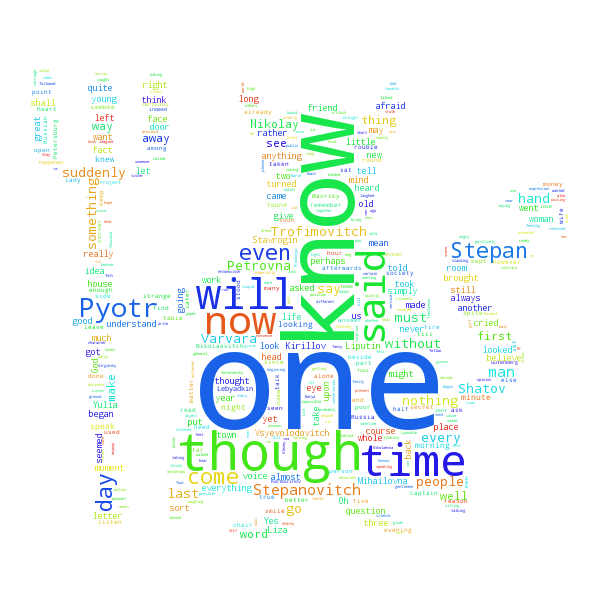

In [45]:
Image('ThePossessed.png')

In [41]:
make_word_cloud(input_text="ThePossessed.txt", mask="devil_stencil.jpg",
                output_file_name="ThePossessed_UniNE.png", stopwords=STOPWORDS)

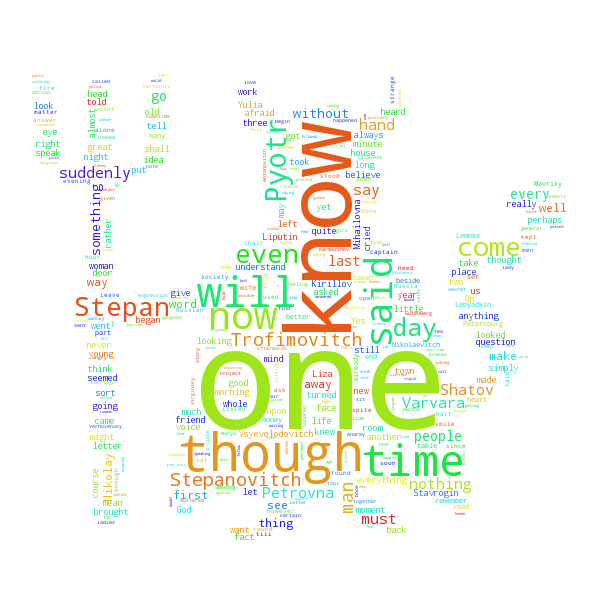

In [47]:
Image('ThePossessed_UniNE.png')

In [36]:
make_word_cloud(input_text="LesPossedes.txt", mask="devil_stencil.jpg",
                output_file_name="LesPossedes.png", stopwords=french_sw, extra_stopwords=["les", "tout"])

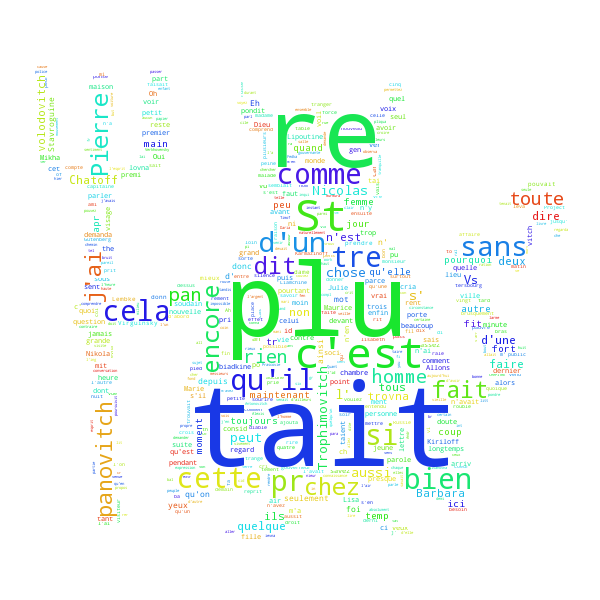

In [46]:
Image('LesPossedes.png')

In [42]:
make_word_cloud(input_text="LesPossedes.txt", mask="devil_stencil.jpg",
                output_file_name="LesPossedes_UniNE.png", stopwords=french_sw_UniNE)

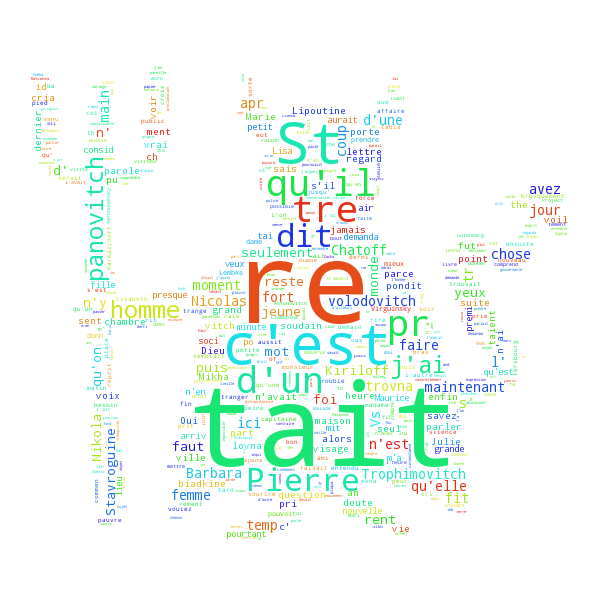

In [50]:
Image('LesPossedes_UniNE.png')

The French version is still dominated by common connection words. Try using the 1000 most common words (also from [UniNE](http://members.unine.ch/jacques.savoy/clef/))?

```
$ wget http://members.unine.ch/jacques.savoy/clef/wordStatfr.txt
```